# SAMPLE_PIP_AND_IMO_PARAMETERS event occurrences are correlated to printers' jobs

## 1. Overview

The analysis in this notebook aims to investigate if the events of SAMPLE_PIP_AND_IMO_PARAMETERS have some correlation with the other print events. 

In this analysis will be used the content of **BOOK9.DAT**, where it is data from a single press “I-Serve” for just a week. This data was sent by NIV and it was used because differently of the other dataset, this one has many events and with them we can check if our focus event, SAMPLE_PIP_AND_IMO_PARAMETERS has correlation with any other.

## 2. Notebook preparation 
### 2.1 Load packages

In [54]:
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("tidyr")) { install.packages("tidyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("ggplot2")) { install.packages("ggplot2", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("purrr")) { install.packages("purrr", lib='/R/library', repos='http://cran.us.r-project.org') }

### 2.2 Reading data

In [55]:
load('book9.dat')
data$event_press = as.character(data$event_press)
str(data)

'data.frame':	5316 obs. of  18 variables:
 $ event_RowNumber  : num  1.61e+10 1.61e+10 1.61e+10 1.61e+10 1.61e+10 ...
 $ event_press      : chr  "45000161" "45000161" "45000161" "45000161" ...
 $ event_recNum     : num  366826 366827 366829 366828 366830 ...
 $ event_date       : POSIXct, format: "2016-07-13 03:00:00" "2016-07-13 03:00:00" ...
 $ event_time       : num  74740 74741 74847 74847 74849 ...
 $ event_name       : chr  "EVENT_HANDLER_STARTED" "PLUG_TIME_DELTA" "PLUG_TIME_DELTA" "EVENT_HANDLER_STARTED" ...
 $ event_jobid      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ event_sheets     : num  0 0 0 0 0 ...
 $ event_impressions: num  0 0 0 0 0 ...
 $ event_state      : chr  "INIT_STATE" "INIT_STATE" "INIT_STATE" "INIT_STATE" ...
 $ event_mode       : chr  "STANDARD_MODE" "STANDARD_MODE" "STANDARD_MODE" "STANDARD_MODE" ...
 $ event_p1         : chr  "5780" "0" "0" "6232" ...
 $ event_p2         : chr  "Event Log COM Server 1.0" "Old Plug" "Old Plug" "Event Log COM Server 1.0" ...
 $ even

## 3. Event occurrences correlated to printers' jobs

In [56]:
table <- data %>% 
    filter(event_name == 'SAMPLE_PIP_AND_IMO_PARAMETERS' | event_name == 'PRINT_JOB_START' ) %>%
    group_by(event_date, event_name) %>%
    summarise(events = n()) %>%
    spread(event_name, events)
table$PRINT_JOB_START[is.na(table$PRINT_JOB_START)] <- 0
table$SAMPLE_PIP_AND_IMO_PARAMETERS[is.na(table$SAMPLE_PIP_AND_IMO_PARAMETERS)] <- 0
table <- table %>%
    gather(event_name, events, 2:3)

table= DT[event_name == 'SAMPLE_PIP_AND_IMO_PARAMETERS' | event_name == 'PRINT_JOB_START', .N, by = list(event_date, event_name)][order(event_name,N)] %>% setnames(c("event_date", "event_name", "events"))

In [66]:
print(table)

Source: local data frame [10 x 3]
Groups: event_date [5]

            event_date                    event_name events
                (time)                         (chr)  (dbl)
1  2016-07-13 03:00:00               PRINT_JOB_START     64
2  2016-07-14 03:00:00               PRINT_JOB_START     96
3  2016-07-15 03:00:00               PRINT_JOB_START     92
4  2016-07-18 03:00:00               PRINT_JOB_START      0
5  2016-07-19 03:00:00               PRINT_JOB_START     20
6  2016-07-13 03:00:00 SAMPLE_PIP_AND_IMO_PARAMETERS     14
7  2016-07-14 03:00:00 SAMPLE_PIP_AND_IMO_PARAMETERS     26
8  2016-07-15 03:00:00 SAMPLE_PIP_AND_IMO_PARAMETERS     22
9  2016-07-18 03:00:00 SAMPLE_PIP_AND_IMO_PARAMETERS      3
10 2016-07-19 03:00:00 SAMPLE_PIP_AND_IMO_PARAMETERS      5


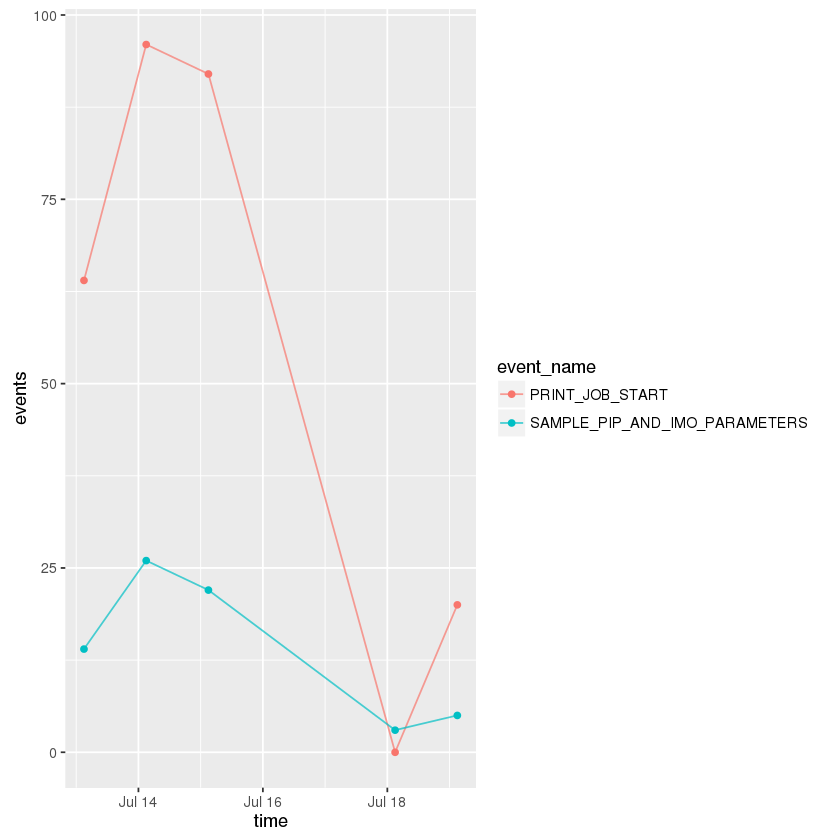

In [58]:
ggplot(table, aes(x=event_date, y=events, col=event_name)) +
    xlab("time") + 
    ylab("events") +
    geom_point() +
    geom_line(alpha = 0.7) 

## 4. Check ratio between print jobs and sample_pip events

Based in the occurrences of PRINT_JOB_START and SAMPLE_PIP_AND_IMO_PARAMETERS, we will calculate the ratio to see if there is a relationship between these two events.

In [65]:
ratio <- spread(table, event_name, events)
ratio["ratio"] <- NA
ratio$ratio <- ratio$PRINT_JOB_START /ratio$SAMPLE_PIP_AND_IMO_PARAMETERS
print(ratio)

Source: local data frame [5 x 4]
Groups: event_date [5]

           event_date PRINT_JOB_START SAMPLE_PIP_AND_IMO_PARAMETERS    ratio
               (time)           (dbl)                         (dbl)    (dbl)
1 2016-07-13 03:00:00              64                            14 4.571429
2 2016-07-14 03:00:00              96                            26 3.692308
3 2016-07-15 03:00:00              92                            22 4.181818
4 2016-07-18 03:00:00               0                             3 0.000000
5 2016-07-19 03:00:00              20                             5 4.000000


## 5. Conclusion

In this notebook shows that:
* **1** - Just one week for just one printer data is too low information to conclude something about the printer behavior;
* **2** - Looking for the data, there is correlation between the number of events (ratio around 4) between PRINT_JOBS and SAMPLE_PIP events;
* **3** - Even days without print job events had sample_pip events, so the sample_pip event are not triggered or "linked" with the print job ones.

There is a difference between the numbers of printer jobs (PRINT_JOB_START) and the amount of SAMPLE_PIP_AND_IMO_PARAMETERS events, so should have days where jobs were printed but the SAMPLE_PIP event was not "called" to collect the data ().

The dataset used is from book9.xlsx file sent by Niv - 07/20/2016, and checking the data, this can indicate why we have many days without SAMPLE_PIP events and why there is some printers with many events and other with just few ones.